# Activity: Run simple linear regression

## **Introduction**


As you're learning, simple linear regression is a way to model the relationship between two variables. By assessing the direction and magnitude of a relationship, data professionals are able to uncover patterns and transform large amounts of data into valuable knowledge. This enables them to make better predictions and decisions. 

In this lab, you are part of an analytics team that provides insights about your company's sales and marketing practices. You have been assigned to a project that focuses on the use of influencer marketing. For this task, you will explore the relationship between your radio promotion budget and your sales. 

The dataset provided includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, company leaders will make decisions about where to focus future marketing resources. Therefore, it is critical to provide them with a clear understanding of the relationship between types of marketing campaigns and the revenue generated as a result of this investment.

## **Step 1: Imports** 


Import relevant Python libraries and modules.

In [1]:
# Import relevant Python libraries and modules.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols


The dataset provided is a .csv file (named `marketing_sales_data.csv`), which contains information about marketing conducted in collaboration with influencers, along with corresponding sales. Assume that the numerical variables in the data are expressed in millions of dollars. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

**Note:** This is a fictional dataset that was created for educational purposes and modified for this lab. 

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ###
data = pd.read_csv(r"C:\Users\saswa\Documents\GitHub\Python-For-Data-Analysis\Course-5\Data\module_2_data\marketing_sales_data.csv")

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to what you learned about loading data in Python.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

There is a function in the `pandas` library that allows you to read data from a .csv file and load the data into a DataFrame.
 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use the `read_csv()` function from the `pandas` library. 

</details>

## **Step 2: Data exploration** 


To get a sense of what the data includes, display the first 10 rows of the data.

In [3]:
# Display the first 10 rows of the data.

data.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to what you learned about exploring datasets in Python.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function in the `pandas` library that allows you to get a specific number of rows from the top of a DataFrame.
 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use the `head()` function from the `pandas` library. 

</details>

**Question:** What do you observe about the different variables included in the data?

The dataset consists of five key variables: TV, Radio, Social Media, Influencer type, and Sales. Upon examination:

- TV: This field categorizes the promotion budget into three levels: Low, Medium, and High. These categories represent qualitative values rather than numerical amounts, differentiating it from other budget-related fields.

- Radio and Social Media: These fields contain numerical values representing the actual budgets allocated to these platforms for the promotion.

- Influencer: This field indicates the type of influencer involved in the promotion, categorized by the number of followers. The options include Mega, Macro, Micro, and Nano, where the classification depends on the influencer's follower count.

- Sales: This field represents the revenue generated from the promotional campaigns, serving as the dependent variable in the analysis.

The overall structure reflects both categorical and numerical variables, with Sales as the dependent outcome based on different marketing strategies.

Next, to get a sense of the size of the dataset, identify the number of rows and the number of columns.

In [4]:
# Display number of rows, number of columns.

data.shape

(572, 5)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to what you learned about exploring datasets in Python.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

There is a property in every DataFrame in `pandas` that gives you access to the number of rows and the number of columns as a tuple.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use the `shape` property.

</details>

**Question:** How many rows and columns exist in the data?

The dataset contains 572 rows and 5 columns. Each row represents a unique observation, which could correspond to an individual company, and the 5 columns represent different aspects of the marketing campaigns for those companies. These aspects include the promotional budget across TV, Radio, and Social Media platforms, the type of influencer used, and the resulting sales from the campaigns.



Now, check for missing values in the rows of the data. This is important because missing values are not that meaningful when modeling the relationship between two variables. To do so, begin by getting Booleans that indicate whether each value in the data is missing. Then, check both columns and rows for missing values.

In [5]:
# Start with .isna() to get booleans indicating whether each value in the data is missing.

data.isna()

,TV,Radio,Social Media,Influencer,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
567,False,False,False,False,False
568,False,False,False,False,False
569,False,False,False,False,False
570,False,False,False,False,False


In [6]:
data.isna().any(axis=0)

TV               True
Radio            True
Social Media    False
Influencer      False
Sales            True
dtype: bool

In [7]:
data.isna().any(axis=0).sum()

np.int64(3)

In [8]:
data[data[['TV', 'Radio', 'Sales']].isna().any(axis=1)]


,TV,Radio,Social Media,Influencer,Sales
232,NaN,34.111674,4.624148,Nano,342.913372
443,High,36.466753,5.635992,Mega,NaN
510,Low,NaN,4.132526,Macro,78.031498


If you would like to read more about the `isna()` function, refer to its documentation in the references section of this lab.

In [9]:
# Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row.

data.isna().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
567    False
568    False
569    False
570    False
571    False
Length: 572, dtype: bool

If you would like to read more about the `any()` function, refer to its documentation in the references section of this lab.

In [10]:
# Use .sum() to get the number of rows that contain missing values.

data.isna().any(axis=1).sum()

np.int64(3)

If you would like to read more about the `sum()` function, refer to its documentation in the references section of this lab.

**Question:** How many rows containing missing values?

There are 3 rows with missing values across 3 columns. While this is a small proportion compared to the total number of rows, it’s important to address these missing values before proceeding with modeling. In this case, it may be appropriate to either drop these rows or handle the missing values using imputation methods, depending on the context and the modeling approach.



Next, drop the rows that contain missing values. Data cleaning makes your data more usable for analysis and regression. Then, check to make sure that the resulting data does not contain any rows with missing values.

In [11]:
# Use .dropna(axis=0) to indicate that you want rows which contain missing values to be dropped. To update the DataFrame, reassign it to the result.

data = data.dropna(axis=0)

In [12]:
# Start with .isna() to get booleans indicating whether each value in the data is missing.
# Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row.
# Use .sum() to get the number of rows that contain missing values


data.isna().any(axis=1).sum()

np.int64(0)

The next step for this task is checking model assumptions. To explore the relationship between radio promotion budget and sales, model the relationship using linear regression. Begin by confirming whether the model assumptions for linear regression can be made in this context. 

**Note:** Some of the assumptions can be addressed before the model is built. These will be addressed in this section. After the model is built, you will finish checking the assumptions.

Create a plot of pairwise relationships in the data. This will help you visualize the relationships and check model assumptions. 

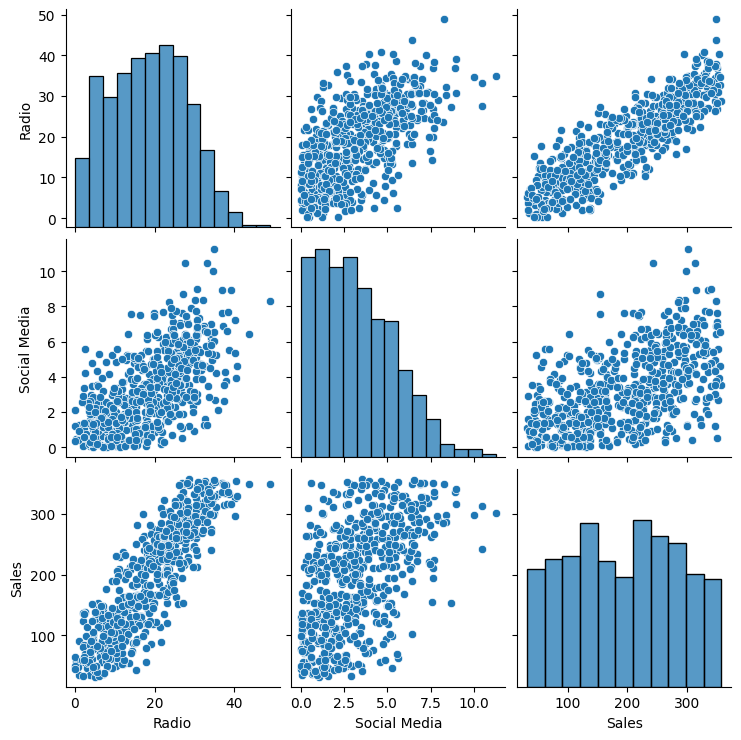

In [13]:
# Create plot of pairwise relationships.

sns.pairplot(data=data)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video section about creating a plot that shows the relationships between pairs of variables.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function in the `seaborn` library that you can call to create a plot that shows the 
  relationships between pairs of variables.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `pairplot()` function from the `seaborn` library.

</details>

**Question:** Is the assumption of linearity met?

Yes, the scatter plot of Sales versus Radio shows a clear linear relationship. The points appear to follow a roughly straight line, suggesting a positive correlation between the two variables. This indicates that as the radio promotion budget increases, sales tend to increase as well, supporting the assumption of linearity.

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video section about checking model assumptions for linear regression.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  Use the scatterplot of `Sales` over `Radio` found in the preceding plot of pairwise relationships. 

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

  Check the scatterplot of `Sales` over `Radio` found in the plot of pairwise relationships. If the data points cluster around a line, that indicates that the assumption of linearity is met. Alternatively, if the data points resemble a random cloud or a curve, then a linear model may not fit the data.  

</details>

## **Step 3: Model building** 

Select only the columns that are needed for the model.

In [14]:
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


In [15]:
# Select relevant columns.
# Save resulting DataFrame in a separate variable to prepare for regression.

ols_data=data[['Radio','Sales']]


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about selecting multiple columns from a DataFrame.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  Use two pairs of square brackets around the names of the columns that should be selected.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

  Make sure column names are spelled exactly as they are in the data.

</details>

Now, display the first 10 rows of the new DataFrame to better understand the data.

In [16]:
# Display first 10 rows of the new DataFrame.

ols_data.head(10)


,Radio,Sales
0,1.218354,90.054222
1,14.949791,222.741668
2,10.377258,102.774790
3,26.469274,328.239378
4,36.876302,351.807328
5,25.561910,261.966812
6,37.263819,349.861575
7,13.187256,140.415286
8,29.520170,264.592233
9,3.773287,55.674214


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about displaying contents of a DataFrame.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function in the `pandas` library that allows you to display the first n number of rows of a DataFrame, where n is a number of your choice.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

  Call the `head()` function from the `pandas` library and pass in the number of rows from the top that you want to display. 

</details>

Next, write the linear regression formula for modeling the relationship between the two variables of interest.

In [17]:
# Write the linear regression formula.
# Save it in a variable.

ols_formula="Sales ~ Radio"

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video section where model building for linear regression is discussed. 

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  Save the formula as string.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

  Use a tilde to separate the y variable from the x variable so that the computer understands which is which. Make sure the spelling of each variable exactly matches the corresponding column from the data.

</details>

Now, implement the ordinary least squares (OLS) approach for linear regression.

In [18]:
# Implement OLS.

OLS=ols(formula=ols_formula,data=ols_data)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video that discusses model building for linear regression.  

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function from the `statsmodels` library that can be called to implement OLS.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

  You can call the `ols()` function from the `statsmodels` library.

</details>

Now, create a linear regression model for the data and fit the model to the data.

In [19]:
# Fit the model to the data.
# Save the fitted model in a variable.


model=OLS.fit()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video section where model building for linear regression is discussed.  

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function from the `statsmodels` library that can be called to fit the model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `fit()` function from the `statsmodels` library.

</details>

## **Step 4: Results and evaluation** 


Begin by getting a summary of the results from the model.

In [20]:
# Get summary of results.

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Tue, 11 Feb 2025   Prob (F-statistic):          2.07e-176
Time:                        23:22:07   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

You may find it helpful to refer back to the video section where getting model results is discussed.  

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function from the `statsmodels` library that can be called to get the summary of results from a model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `summary()` function from the `statsmodels` library.

</details>

Next, analyze the bottom table from the results summary. Based on the table, identify the coefficients that the model determined would generate the line of best fit. The coefficients are the y-intercept and the slope. 

**Question:** What is the y-intercept? 

The y-intercept of the regression equation is 41.5326. This represents the expected value of Sales when the Radio promotion budget is zero.

**Question:** What is the slope? 

The slope is 8.1733. This indicates that for each 1 million dollar increase in the Radio promotion budget, the Sales are expected to increase by 8.1733 million dollars on average.

**Question:** What linear equation would you write to express the relationship between sales and radio promotion budget? Use the form of y = slope * x + y-intercept? 


The linear equation that expresses the relationship between Sales and Radio promotion budget is:

Sales=8.173×Radio Promotion Budget+41.5326

This equation suggests that for every 1 million dollar increase in the radio budget, sales are expected to increase by 8.173 million dollars, with a baseline sales of 41.5326 million dollars when the radio budget is zero.

**Question:** What does the slope mean in this context?

The slope of 8.173 in this context indicates the relationship between the radio promotion budget and sales.

- One interpretation: If a company increases its radio budget by 1 million dollars, the company's sales would, on average, increase by 8.173 million dollars.
- Another interpretation: Companies with a 1 million dollar higher radio promotion budget are expected to generate 8.173 million dollars more in sales, on average.
  
In simpler terms, for every 1 million dollar increase in the radio promotion budget, sales are predicted to rise by 8.173 million dollars.

Now that you've built the linear regression model and fit it to the data, finish checking the model assumptions. This will help confirm your findings. First, plot the OLS data with the best fit regression line.

<Axes: xlabel='Radio', ylabel='Sales'>

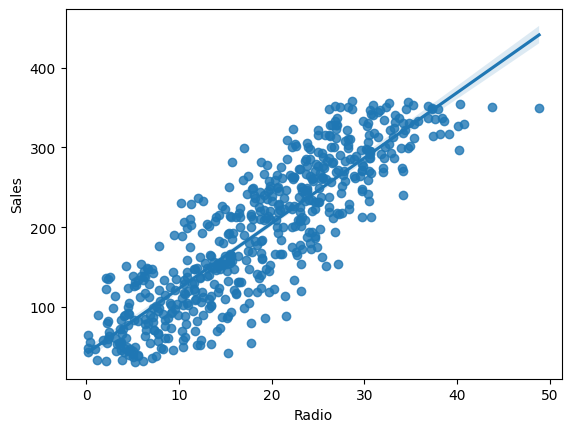

In [21]:
# Plot the OLS data with the best fit regression line.

sns.regplot(x='Radio',y='Sales',data=ols_data)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about plotting data with the best fit regression line.  

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function from the `seaborn` library that can be useful here.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `regplot()` function from the `seaborn` library.

</details>

**Question:** What do you observe from the preceding regression plot?

The preceding regression plot shows a clear linear relationship between the two variables, with the points clustering around the best-fit line. This indicates a positive correlation between the radio promotion budget and sales, supporting the assumption of linearity.

Now, check the normality assumption. Get the residuals from the model.

In [22]:
# Get the residuals from the model.

residuals=model.resid

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about accessing residuals.  

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is an attribute from the `statsmodels` library that can be called to get the residuals from a fitted model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `resid` attribute from the `statsmodels` library.

</details>

Now, visualize the distribution of the residuals.

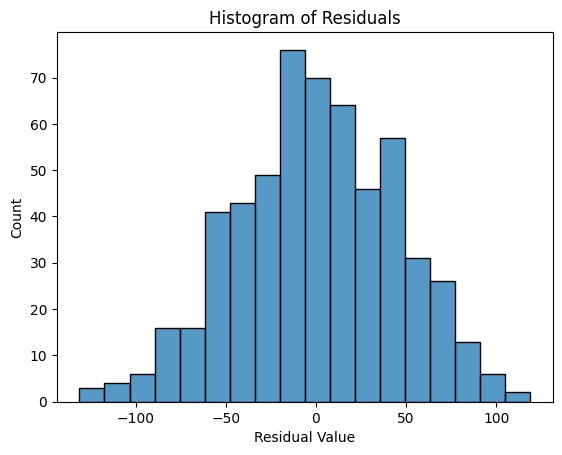

In [23]:
# Visualize the distribution of the residuals.

fig=sns.histplot(data=residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about visualizing residuals.  

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function from the `seaborn` library that can be called to create a histogram.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `histplot()` function from the `seaborn` library.

</details>

**Question:** Based on the visualization, what do you observe about the distribution of the residuals?

Based on the preceding visualization, the distribution of the residuals appears to be fairly normal, though there is some slight left skewness. This suggests that the assumption of normality is mostly met, but there may be a minor deviation from perfect normality.



Next, create a Q-Q plot to confirm the assumption of normality.

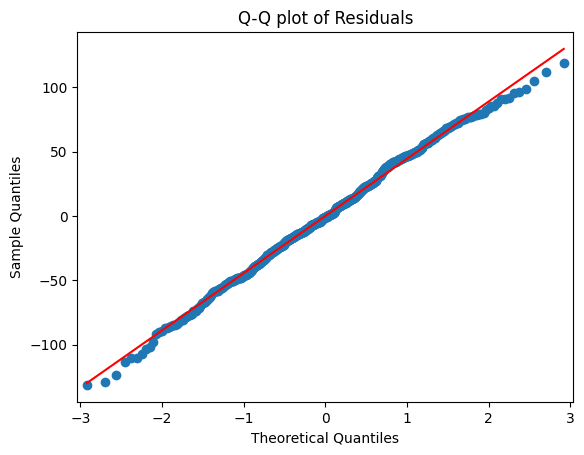

In [24]:
# Create a Q-Q plot.

sm.qqplot(residuals,line='s')
plt.title("Q-Q plot of Residuals")
plt.show()


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about creating a Q-Q plot.  

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function from the `statsmodels` library that can be called to create a Q-Q plot.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `qqplot()` function from the `statsmodels` library.

</details>

**Question:** Is the assumption of normality met?

Yes, the assumption of normality appears to be met. In the Q-Q plot, the residuals' quantiles closely follow the theoretical quantiles of a standard normal distribution, aligning along the diagonal line. This linearity and the accumulation of points around the line suggest that the residuals are normally distributed.



Now, check the assumptions of independent observation and homoscedasticity. Start by getting the fitted values from the model.

In [25]:
# Get fitted values.

fitted_values=model.predict(ols_data['Radio'])

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about calculating fitted values.  

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function from the `statsmodels` library that can be called to calculate fitted values from the model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `predict()` function from the `statsmodels` library. Make sure to pass in the column from `ols_data` corresponding to the x variable.

</details>

Next, create a scatterplot of the residuals against the fitted values.

Text(0, 0.5, 'Residuals')

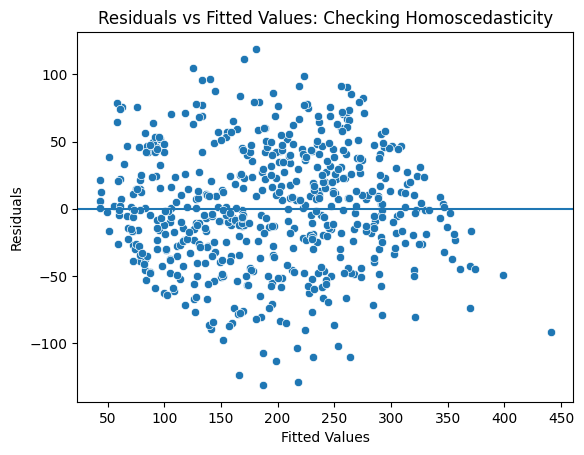

In [26]:
# Create a scatterplot of residuals against fitted values.

sns.scatterplot(x=fitted_values,y=residuals)
plt.axhline(0)
plt.title("Residuals vs Fitted Values: Checking Homoscedasticity")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

#or use
# fig = sns.scatterplot(x=fitted_values, y=residuals)
# fig.axhline(0)
# fig.set_title("Residuals vs Fitted Values: Checking Homoscedasticity")
# fig.set_xlabel("Fitted Values")
# fig.set_ylabel("Residuals")



<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about visualizing residuals against fitted values.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function from the `seaborn` library that can be called to create a scatterplot.

</details>

<details>
  <summary><h4>Hint 3</h4></summary>

Call the `scatterplot()` function from the `seaborn` library.

</details>

**Question:** Are the assumptions of independent observation and homoscedasticity met?


Yes, both assumptions are met. In the scatterplot of residuals vs. fitted values, the data points are randomly scattered without forming any discernible pattern, suggesting that the assumption of independent observations is not violated. Additionally, the residuals are evenly distributed, supporting the assumption of homoscedasticity, where the variance of the residuals remains constant across all levels of the predictor variable.



## **Considerations**

**What are some key takeaways that you learned during this lab?**

The key takeaway from this lab is that statsmodels.formula.api, specifically the ols method, is a valuable tool for fitting the best-fit regression line to data. This allows us to express the relationship between two variables and predict future values of the dependent variable based on the independent variable. Additionally, I learned that exploratory data analysis and visualizations can be powerful tools in assessing whether linear regression is suitable for modeling the relationship between two variables.

The lab also reinforced the importance of the four assumptions in linear regression. Two assumptions—linearity and normality—can be checked through visualizations before building the model. The other two assumptions—independent observations and homoscedasticity—can be evaluated post-modeling, with the help of both visualizations and logical reasoning (particularly for independence).

From the regression model results and regression plot, I learned that for each additional 1 million dollars spent on radio promotions, there is an average increase of 8.173 million dollars in sales. This indicates a positive correlation between radio budget and sales.



**How would you present your findings from this lab to others?**

The simple linear regression model yields a y-intercept of 41.5326 and a slope of 8.1733. This can be interpreted in two ways:

- Interpretation 1: If a company increases its radio promotion budget by 1 million dollars, the sales are expected to increase by 8.1733 million dollars on average.
- Interpretation 2: Companies that spend 1 million dollars more on their radio promotion budget will, on average, see an increase of 8.1733 million dollars in sales.
  
The results are statistically significant with a p-value of 0.000, which is much smaller than the common significance level of 0.05. This suggests that the probability of observing such extreme data, assuming no relationship between radio promotion budget and sales (i.e., the null hypothesis), is very low. Therefore, the null hypothesis (that there is no relationship between radio budget and sales) can be rejected, indicating that there is a significant relationship between radio promotion budget and sales.

The slope of the line is approximate and comes with some uncertainty. The 95% confidence interval for the slope is from 7.791 to 8.555, meaning that we can be 95% confident that the true value of the slope lies within this interval.

To make the results more digestible, I would present simplified visualizations that demonstrate the relationship between the radio promotion budget and sales, and explain the correlation and slope in terms that relate to real-world business decisions.



**What summary would you provide to stakeholders?**

Based on the analysis, there is a strong positive correlation between radio promotion budget and sales for the companies in this dataset. For every 1 million dollar increase in the radio promotion budget, sales are expected to increase by approximately 8.173 million dollars on average. The statistical significance of this relationship (p-value = 0.000) suggests that the association is robust and unlikely to be due to random chance.

Given this finding, it would be worthwhile for companies to continue investing in radio promotions, as the data indicates a clear benefit. However, I recommend further investigating how this relationship might vary across different industries or product types to better understand the broader implications and optimize marketing strategies.



**References**

[Pandas.DataFrame.Any — Pandas 1.4.3 Documentation.](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html)

[Pandas.DataFrame.Isna — Pandas 1.4.3 Documentation.](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html)

[Pandas.Series.Sum — Pandas 1.4.3 Documentation.](https://pandas.pydata.org/docs/reference/api/pandas.Series.sum.html)

[Saragih, H.S. *Dummy Marketing and Sales Data*.](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.